In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# read movie data 
movies_df = pd.read_csv("IMDB-Movie-Data.csv")

# read tips data 
tips = sns.load_dataset("tips")

# read fmri data
fmri = sns.load_dataset("fmri")

# create random data 
date_rng = pd.date_range(start='1/1/2018', end='8/1/2018', freq='W')

df = pd.DataFrame(date_rng, columns=['date'])
df['data'] = np.random.randint(0,100,size=(len(date_rng)))
df['type'] = 'a'

df2 = pd.DataFrame(date_rng, columns=['date'])
df2['data'] = np.random.randint(0,100,size=(len(date_rng)))
df2['type'] = 'b'

df3= pd.concat([df,df2])

In [4]:
movies_df.columns = ['rank','title' ,'genre', 'description', 'director', 'actors', 'year', 'runtime', 
                     'rating', 'votes', 'revenue_millions', 'metascore']
movies_df['new_genre'] = movies_df['genre'].apply(lambda x:x.split(',')[0])

In [5]:
movies_df.head()

,rank,title,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore,new_genre
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Action
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Adventure
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Horror
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Animation
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Action


# bar chart

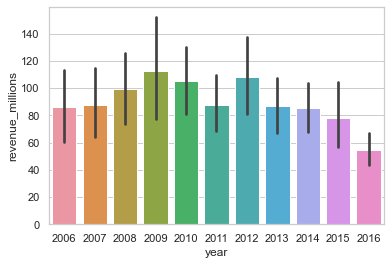

In [6]:
#bar chart
sns.set(style="whitegrid")
ax = sns.barplot(x="year", y="revenue_millions", data=movies_df)

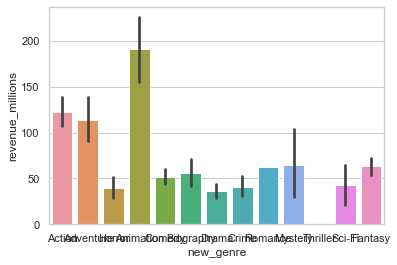

In [7]:
ax = sns.barplot(x="new_genre", y="revenue_millions", data=movies_df)

In [8]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


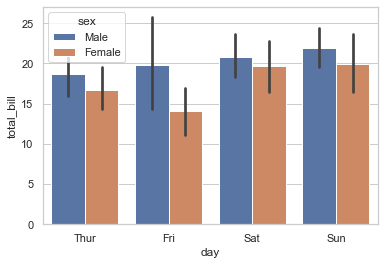

In [9]:
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)

# line chart

In [10]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


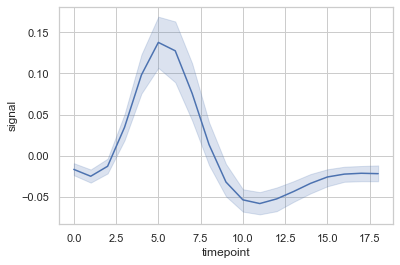

In [11]:
ax = sns.lineplot(x="timepoint", y="signal", data=fmri)

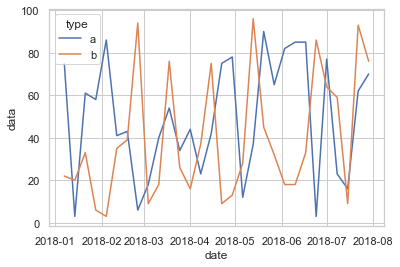

In [12]:
ax = sns.lineplot(x="date", y="data", data=df3, hue='type')

# scatter plot 

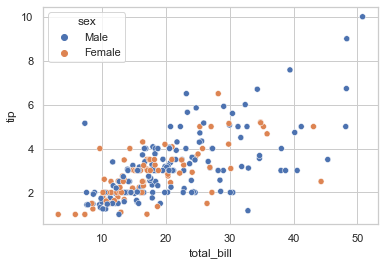

In [13]:
ax = sns.scatterplot(x="total_bill", y="tip", data=tips, hue='sex')

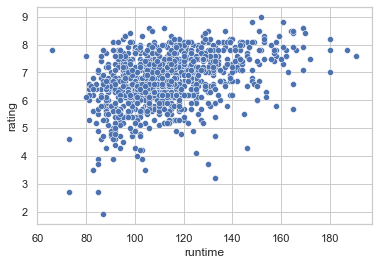

In [14]:
ax = sns.scatterplot(x="runtime", y="rating", data=movies_df)

# heatmap

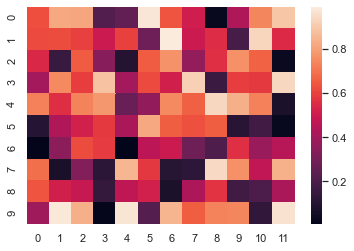

In [15]:
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

In [16]:
movies_df_gb = movies_df[['year','new_genre','revenue_millions']].groupby(['year','new_genre']).agg({'new_genre':'count','revenue_millions':'sum'})
movies_df_gb.columns = ['count_genre','sum_revenue_mio']
movies_df_gb = movies_df_gb.reset_index()

In [17]:
movies_df_gb_pvt = pd.pivot_table(movies_df_gb, values='count_genre', 
                                  index=['year'],columns=['new_genre'], aggfunc=np.sum).fillna(0)

In [18]:
movies_df_gb_pvt.head()

new_genre,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Fantasy,Horror,Mystery,Romance,Sci-Fi,Thriller
year,,,,,,,,,,,,,
2006,11.0,5.0,2.0,2.0,7.0,5.0,10.0,0.0,1.0,1.0,0.0,0.0,0.0
2007,11.0,6.0,3.0,3.0,6.0,9.0,11.0,1.0,2.0,0.0,0.0,0.0,1.0
2008,23.0,1.0,2.0,3.0,8.0,1.0,10.0,0.0,3.0,0.0,0.0,1.0,0.0
2009,14.0,5.0,4.0,3.0,10.0,1.0,10.0,1.0,3.0,0.0,0.0,0.0,0.0
2010,23.0,6.0,5.0,2.0,9.0,4.0,7.0,0.0,2.0,2.0,0.0,0.0,0.0


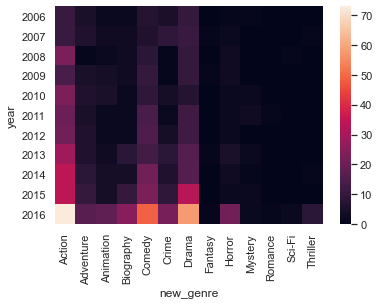

In [19]:
ax = sns.heatmap(movies_df_gb_pvt)